# Import library

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read dataset

In [2]:
df = pd.read_csv('C:\\Ary\\machine-learning\\dataset\\Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Check missing value

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Outlier analysis

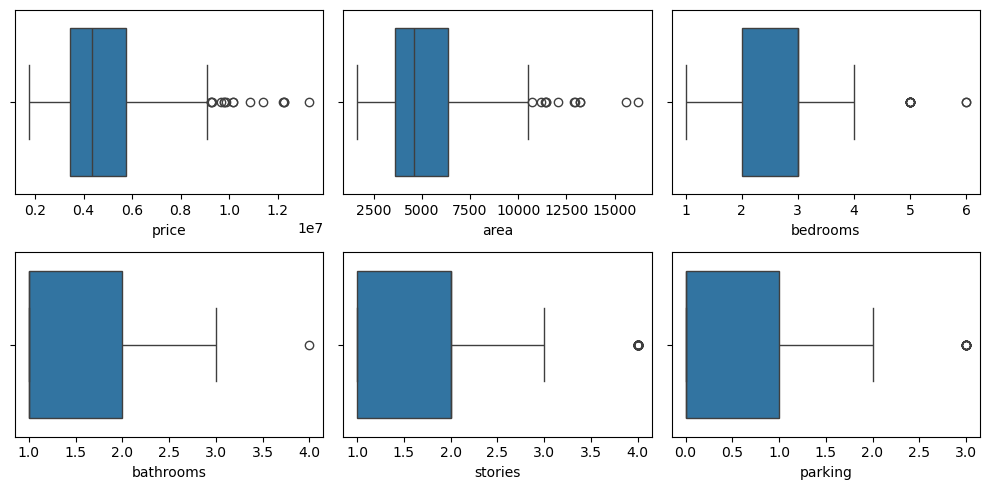

In [6]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x = df['price'], ax = axs[0,0])
plt2 = sns.boxplot(x = df['area'], ax = axs[0,1])
plt3 = sns.boxplot(x = df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(x = df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(x = df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(x = df['parking'], ax = axs[1,2])

plt.tight_layout()

# Outlier treatment

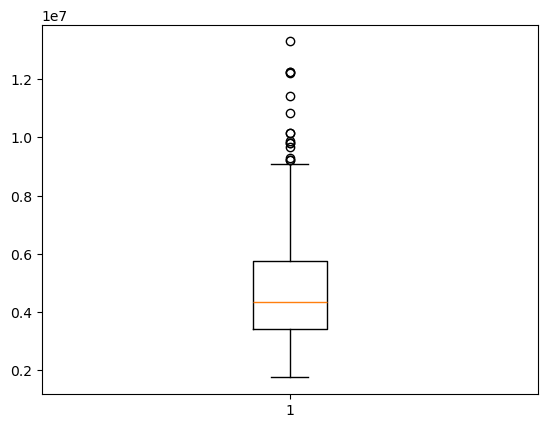

In [7]:
plt.boxplot(df.price)

Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1

df = df[(df.price >= Q1 - 1.5 * IQR) & (df.price <= Q3 + 1.5 * IQR)]

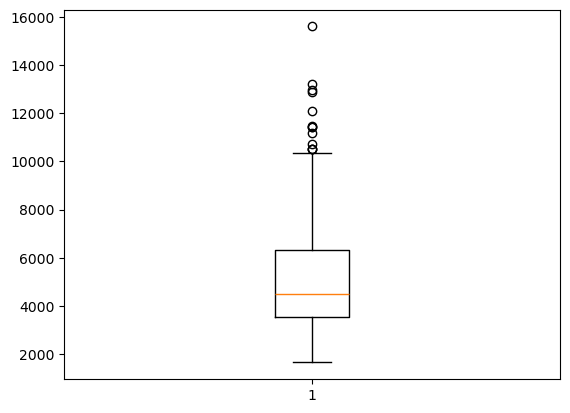

In [8]:
plt.boxplot(df.area)

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1

df = df[(df.area >= Q1 - 1.5 * IQR) & (df.area <= Q3 + 1.5 * IQR)]

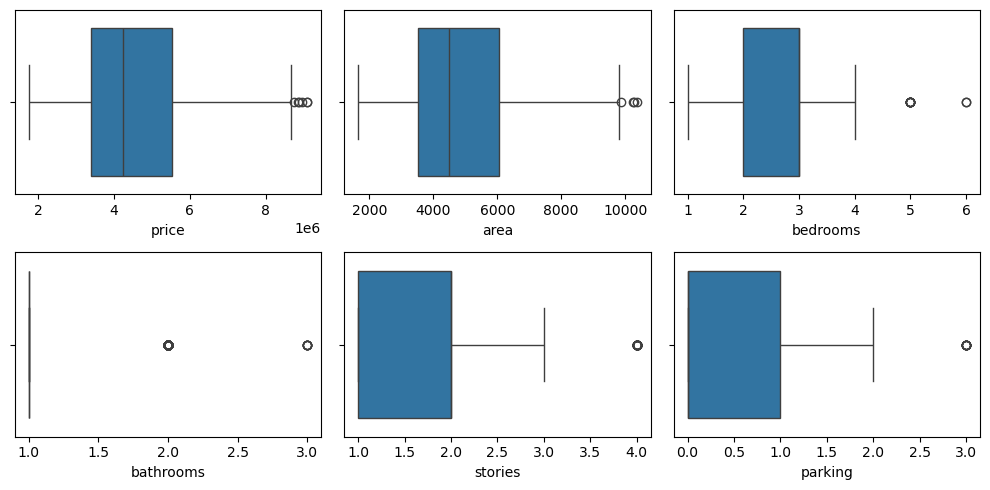

In [9]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x = df['price'], ax = axs[0,0])
plt2 = sns.boxplot(x = df['area'], ax = axs[0,1])
plt3 = sns.boxplot(x = df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(x = df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(x = df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(x = df['parking'], ax = axs[1,2])

plt.tight_layout()

# Exploratory Data Analytics

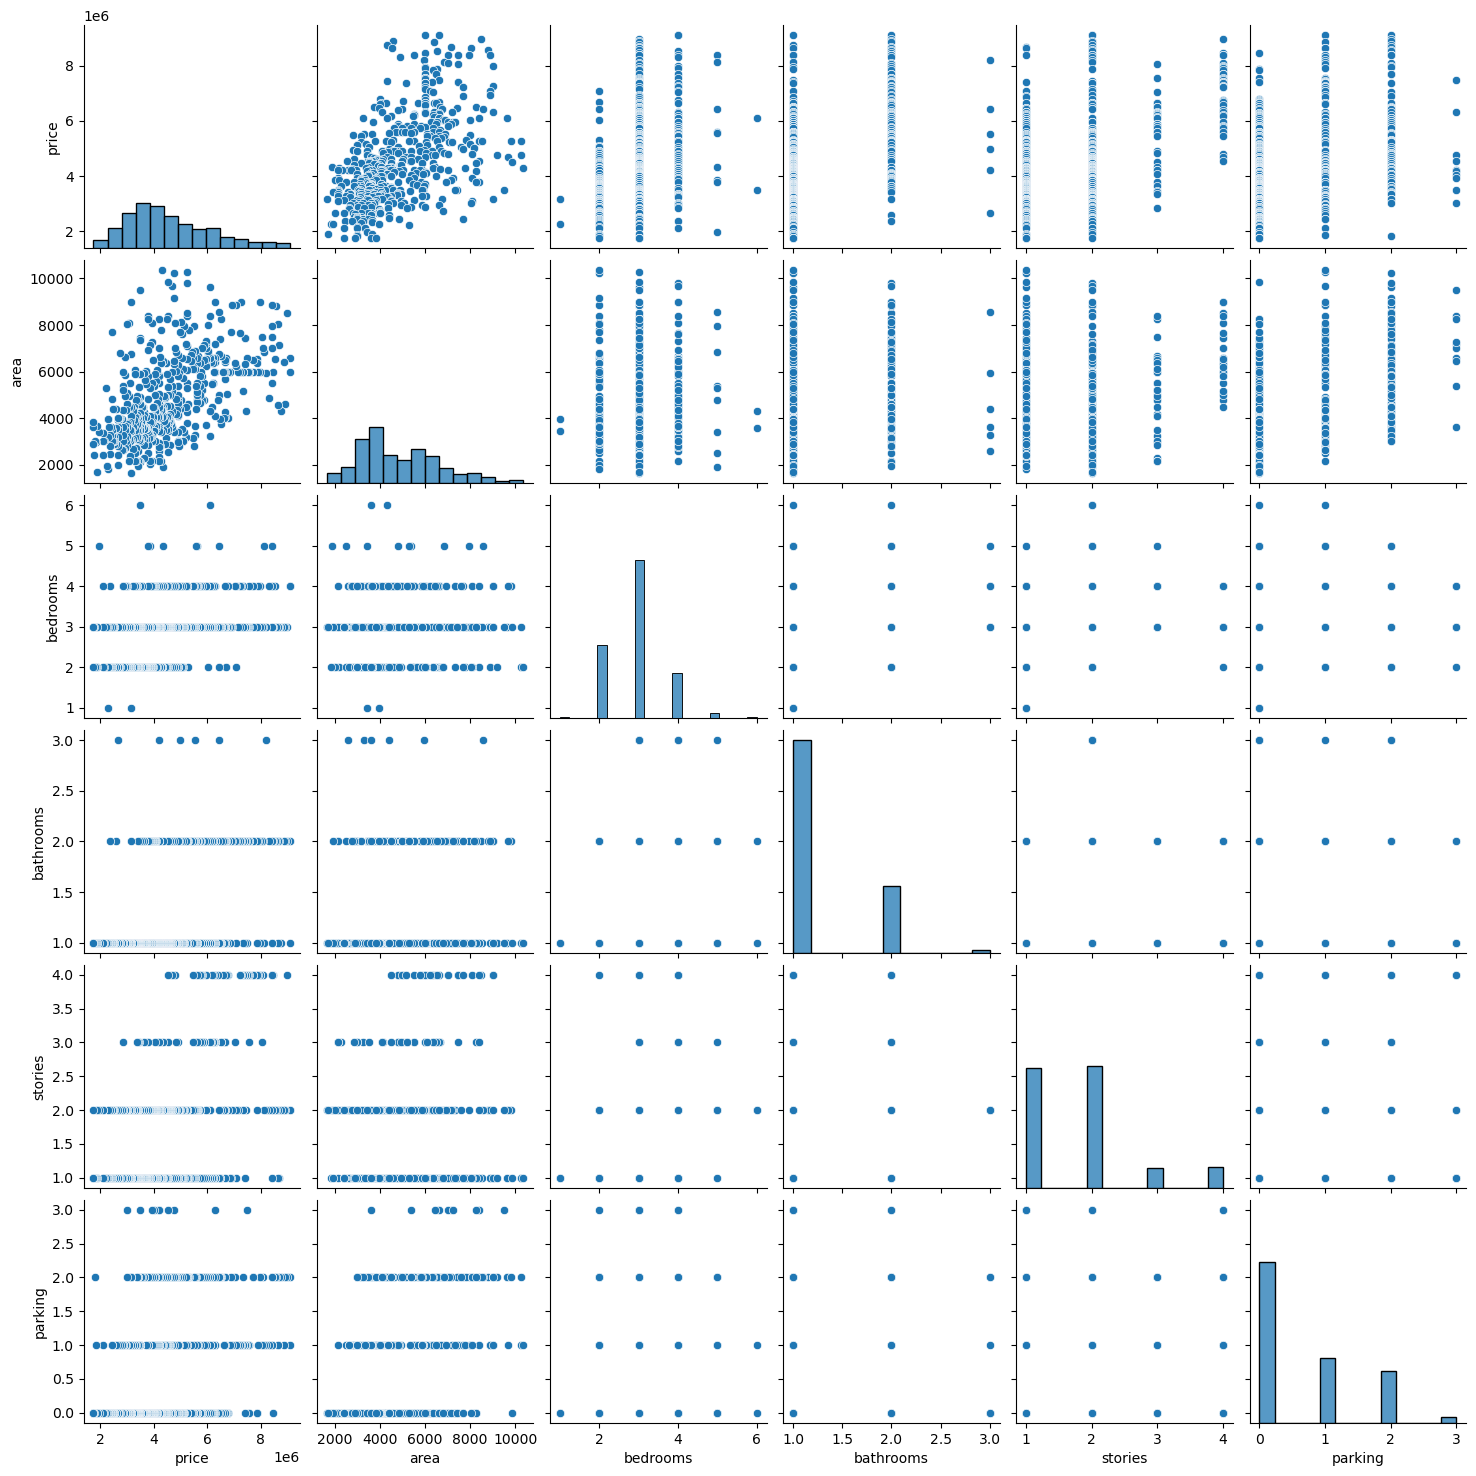

In [10]:
sns.pairplot(df)
plt.show()

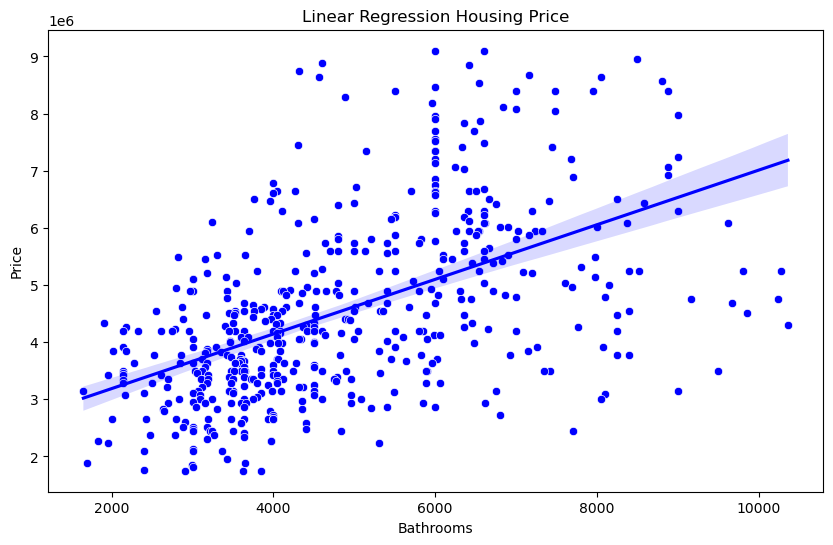

In [11]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = "area", y = "price", color = 'blue')
sns.regplot(data = df, x = "area", y = "price", scatter = False, color = 'blue')

plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Linear Regression Housing Price")

plt.show()

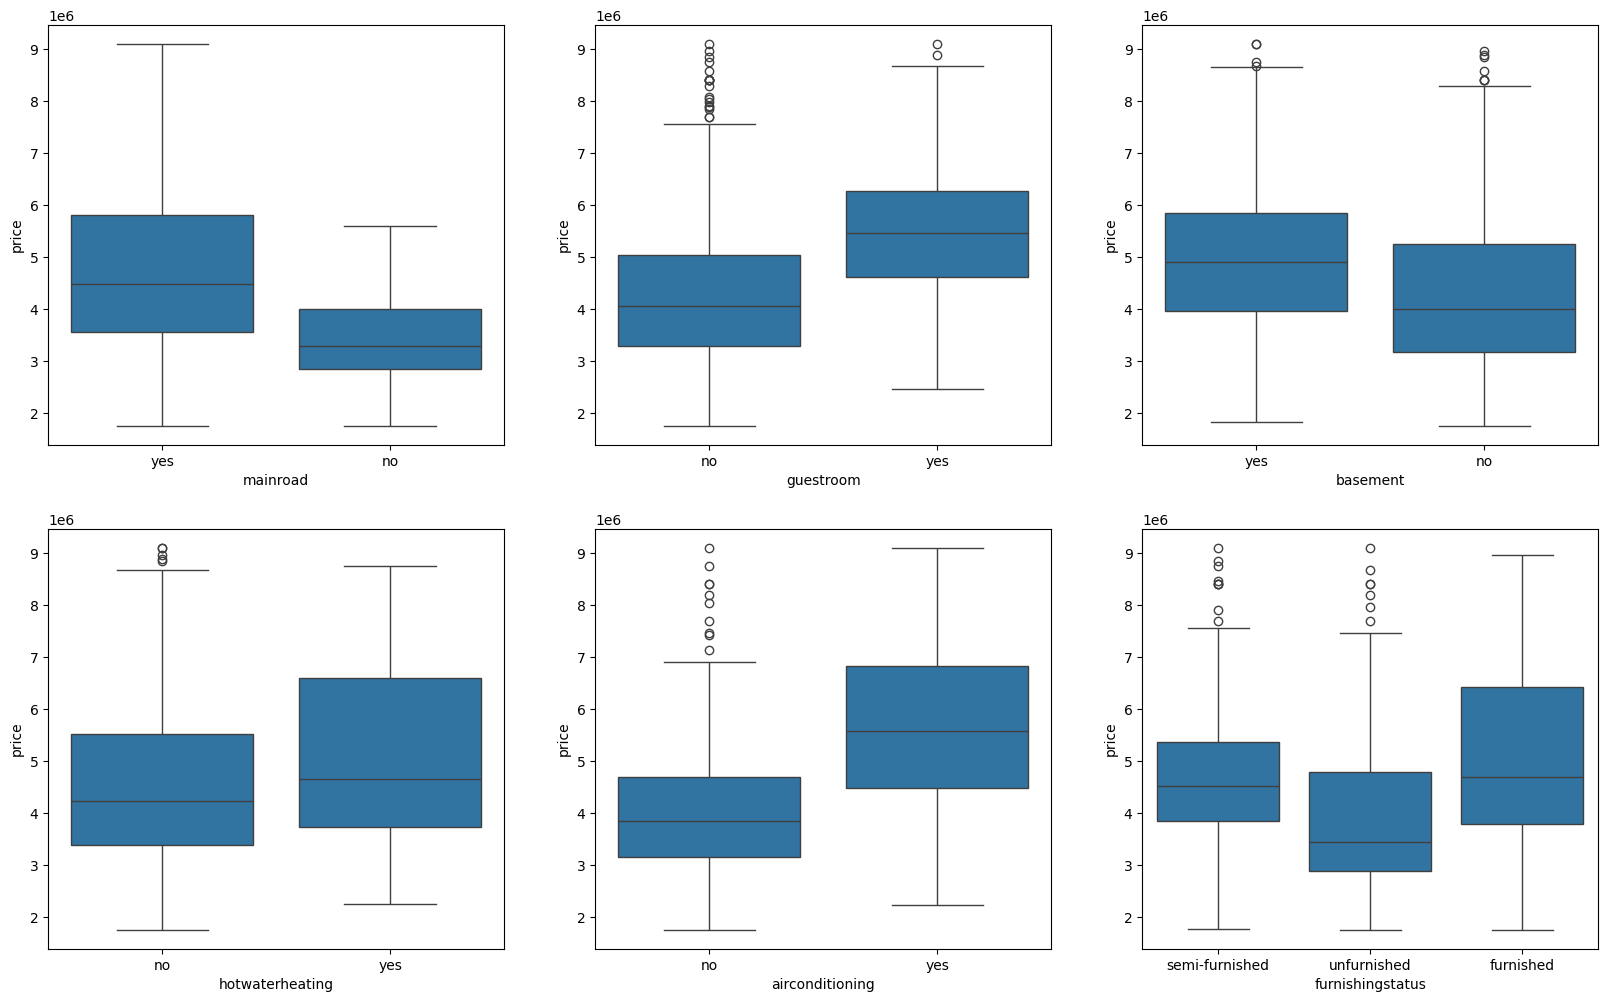

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

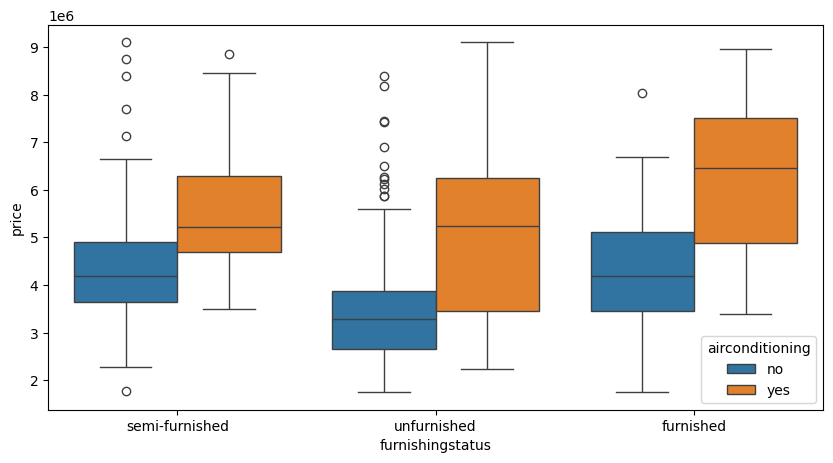

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'furnishingstatus', y = 'price', hue = 'airconditioning')
plt.show()

# Data Preparation

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [15]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


# Dummy Variabels

In [17]:
dummy = pd.get_dummies(df['furnishingstatus'])

dummy.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [18]:
df = pd.concat([df, dummy], axis = 1)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,False,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,True,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,True,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,False,True,False


In [19]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,False,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,True,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,True,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,False,True,False


In [20]:
df.shape

(517, 15)

# Splitting Dataset

In [21]:
X = df.drop(columns = ['price'])
y = df['price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Scaling Feature

In [23]:
scaler = MinMaxScaler()

In [24]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [25]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
356,0.100940,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,True,False,False
199,0.295858,0.4,0.0,0.333333,1,0,0,0,0,0.333333,0,True,False,False
299,0.620722,0.4,0.0,0.000000,1,0,0,0,0,1.000000,0,True,False,False
525,0.230885,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,False,False,True
208,0.153150,0.4,0.0,0.666667,1,0,0,0,0,0.000000,0,False,True,False


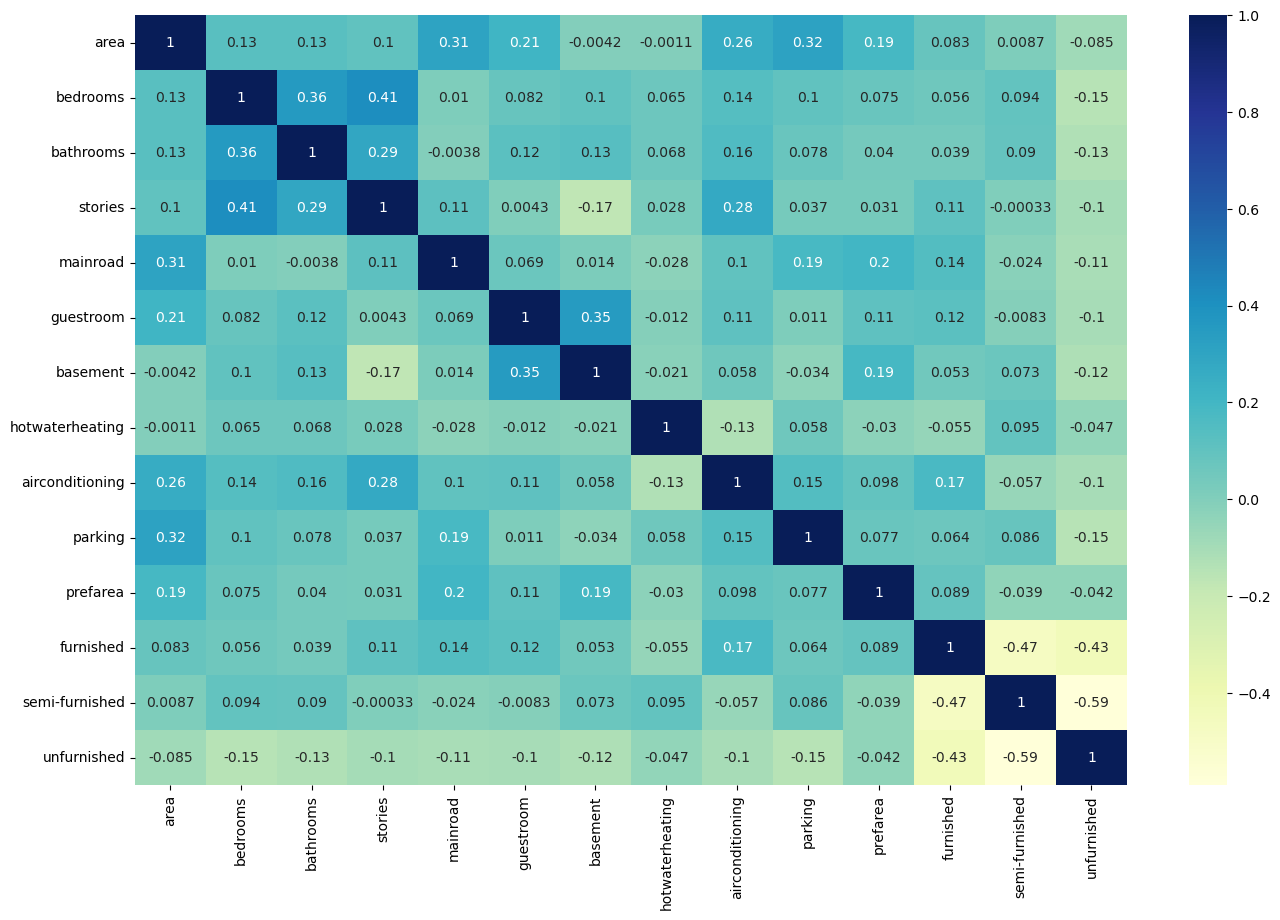

In [26]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

# Scaling Target

In [27]:
y_train = scaler.fit_transform(y_train.to_numpy().reshape(1, -1))

In [28]:
y_train = pd.Series(y_train.flatten(), index = X_train.index, name = 'price')

In [29]:
y_train.head()

356    0.0
199    0.0
299    0.0
525    0.0
208    0.0
Name: price, dtype: float64

# Build Model

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
rfe = RFE(lr, n_features_to_select = 6)
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', np.False_, np.int64(9)),
 ('bedrooms', np.False_, np.int64(8)),
 ('bathrooms', np.False_, np.int64(7)),
 ('stories', np.False_, np.int64(6)),
 ('mainroad', np.False_, np.int64(5)),
 ('guestroom', np.False_, np.int64(4)),
 ('basement', np.False_, np.int64(3)),
 ('hotwaterheating', np.False_, np.int64(2)),
 ('airconditioning', np.True_, np.int64(1)),
 ('parking', np.True_, np.int64(1)),
 ('prefarea', np.True_, np.int64(1)),
 ('furnished', np.True_, np.int64(1)),
 ('semi-furnished', np.True_, np.int64(1)),
 ('unfurnished', np.True_, np.int64(1))]

In [36]:
col = X_train.columns[rfe.support_]

col

Index(['airconditioning', 'parking', 'prefarea', 'furnished', 'semi-furnished',
       'unfurnished'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating'],
      dtype='object')

# Build model with statsmodel

In [58]:
X_train_rfe = X_train[col].copy()

In [59]:
for c in X_train_rfe.select_dtypes(include = ['bool']).columns:
    X_train_rfe[c] = X_train_rfe[c].astype(int)

In [62]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [66]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 20 Sep 2025   Prob (F-statistic):                nan
Time:                        21:33:39   Log-Likelihood:                    inf
No. Observations:                 413   AIC:                              -inf
Df Residuals:                     407   BIC:                              -inf
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const                    0          0     

C:\Users\MSI_\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\MSI_\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1871: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
C:\Users\MSI_\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\MSI_\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
